            1. open  2. high    3. low  4. close  5. volume
2023-06-15   183.96  186.520  183.7800    186.01   65433166
2023-06-16   186.73  186.990  184.2700    184.92  101256225
2023-06-20   184.41  186.100  184.4100    185.01   49799092
2023-06-21   184.90  185.410  182.5901    183.96   49515697
2023-06-22   183.74  187.045  183.6700    187.00   51245327
...             ...      ...       ...       ...        ...
2023-10-31   169.35  170.900  167.9000    170.77   44846017
2023-11-01   171.00  174.230  170.1200    173.97   56934906
2023-11-02   175.52  177.780  175.4600    177.57   77334752
2023-11-03   174.24  176.820  173.3500    176.65   79829246
2023-11-06   176.38  179.430  176.2100    179.23   63841310

[100 rows x 5 columns]


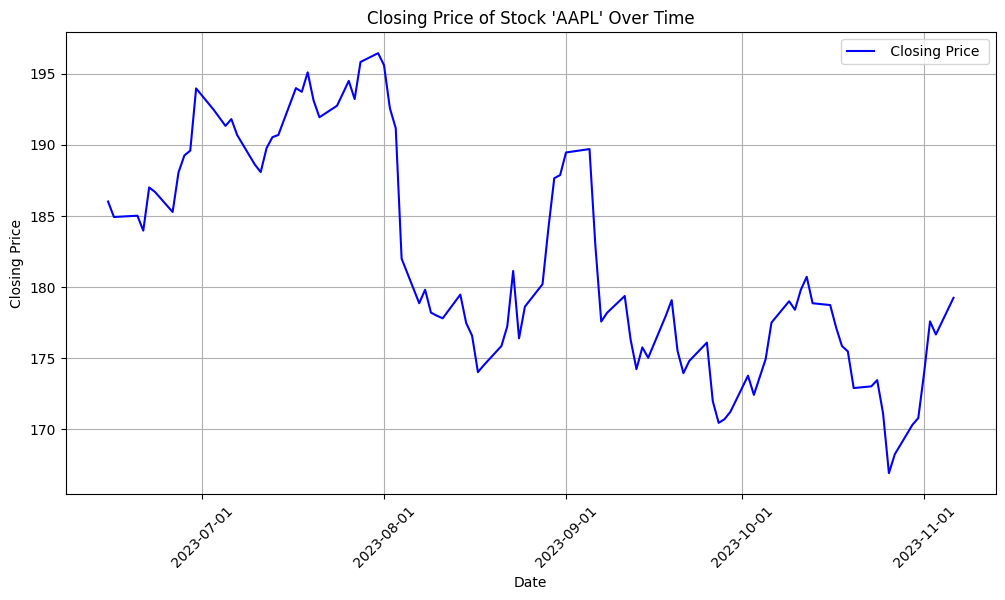

In [34]:
from google.cloud import storage
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

project_credentials = service_account.Credentials.from_service_account_file('data-finance-final-92d8049c252f.json')
project_id = 'data-finance-final'

storage_client = storage.Client(credentials=project_credentials, project=project_id)
bucket_name = 'data_finance_final'

bucket = storage_client.get_bucket(bucket_name)
blobs = bucket.list_blobs()

df = None
stock = ""
blob_count = 0
for blob in blobs:
    blob_count += 1
    if blob_count == 2:  # Process only the second blob
        data_string = blob.download_as_string()
        data = json.loads(data_string)
        stock = data['Meta Data']['2. Symbol']
        # Extract the time series data
        time_series_data = data['Time Series (Daily)']

        # Convert to a DataFrame
        df = pd.DataFrame.from_dict(time_series_data, orient='index')

        # Convert the index to a datetime and sort it
        df.index = pd.to_datetime(df.index)
        df.sort_index(inplace=True)

        # Optional: Convert columns to numeric values if necessary
        for col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

        # Now 'df' is a DataFrame with each row representing a day and columns for open, high, low, close, and volume
        print(df)  # Print the first few rows
        break
    
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['4. close'], label=' Closing Price ', color='blue')

# Formatting the plot
plt.title(f'Closing Price of Stock \'{stock}\' Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()

# Formatting the x-axis to show dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# Show plot
plt.show()